In [1]:
# Sympy Symbolic matrix inverse for the Polar Overturning Circulation model. 
# twnh Jan, Feb 20
# SPENT A LONG TIME BUG HUNTING TO FIND PYTHON STARTS ARRAYS AT ELEMENT 0 NOT 1!!!!

In [2]:
from numpy import *
from sympy import *
import sympy.matrices.matrices
init_printing()
import sympy
import math
from mpmath import mp
from sympy.abc import rho

rho_0, rho_1, rho_2, rho_3, rho_i, rho_s, rho_a, rho = symbols('rho_0 rho_1 rho_2 rho_3 rho_i rho_s rho_a rho', real=True)
Q, Q_m, Q_p, Q_i, F, U_1, U_2, U_3, U_i, u_s, S_s, T_f, T_1, T_2, T_3, T_a, T, S_1, S_2, S_3, S_a, S_i, S, Sstar = symbols('Q Q_m Q_p Q_i F U_1 U_2 U_3 U_i u_s S_s T_f T_1 T_2 T_3 T_a T S_1 S_2 S_3 S_a S_i S Sstar', real=True)
c_p, L, phi, Phi, gamma, DeltaS = symbols('c_p L phi Phi gamma DeltaS', real=True)
X = symbols('X', real=True)

Matrix E:


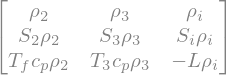

 
E inverse:


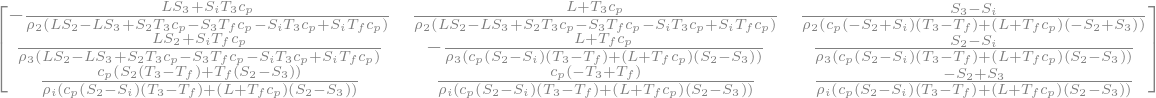

 
E determinant:


 
T3 formula for determinant=0:


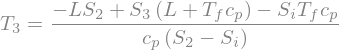

 
Right hand side:


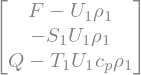

 
------------------------------------------------------------------------------------------------------------
 
Formula for U_2:


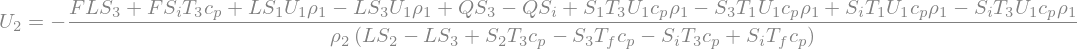

 
Q formula in U_2=0


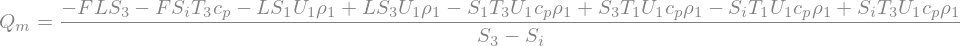

 
T3 formula in U_2=0


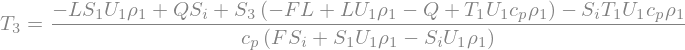

 
T3 formula in U_2=0 intercepts T_f at S*


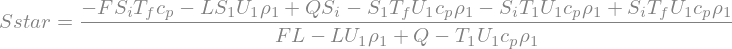

 
T3 formula in U_2=-X (e.g., X = U_1)


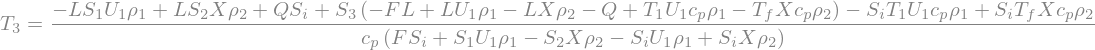

 
------------------------------------------------------------------------------------------------------------
 
Formula for U_3:


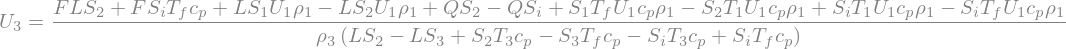

 
Q formula for U_3=0


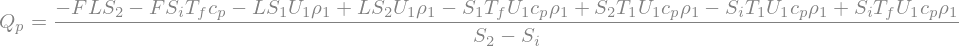

 
S_2 formula for U_3=0


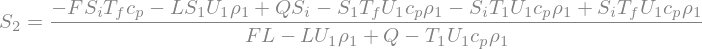

 
S_2 - Sstar formula (checks proposition above)


 
T3 formula in U_3=0: Doesn't exist because numerator doesn't depend on T_3
 
T3 formula in U_3=-X (e.g., X = U_1)


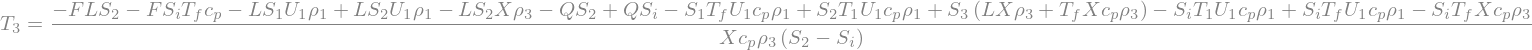

 
------------------------------------------------------------------------------------------------------------
 
Formula for U_i:


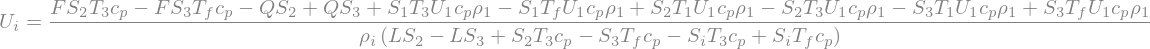

 
Q formula for U_i=0


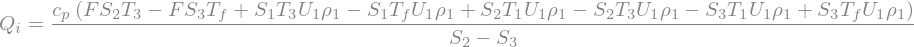

 
T3 formula in U_i=0


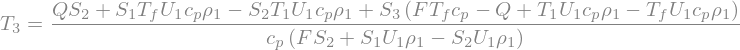

 
T3 formula in U_i=-X (e.g., X = U_1)


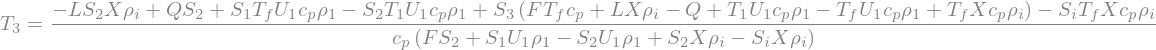

In [3]:
E = Matrix([[rho_2, rho_3, rho_i],[rho_2*S_2, rho_3*S_3, rho_i*S_i],[c_p*rho_2*T_f, c_p*rho_3*T_3, -rho_i*L]])
print("Matrix E:")
display(E)
Einv = simplify(MatrixBase.inverse_LU(E))

print(" ")
print("E inverse:")
display(Einv)

print(" ")
print("E determinant:")
Edet = simplify(MatrixBase.det(E))
display(Edet)

print(" ")
print("T3 formula for determinant=0:")
T3_formula = solve(Eq(0,Edet),T_3)
T3_formula = Eq(T_3,collect(T3_formula[0],S_3))
display(T3_formula)

print(" ")
print("Right hand side:")
rhs = Matrix([ [F - rho_1*U_1],  [- rho_1*U_1*S_1], [Q - c_p*rho_1*U_1*T_1]])
display(rhs)

print(" ")
print("------------------------------------------------------------------------------------------------------------")
print(" ")
print("Formula for U_2:")
soln = Einv*rhs
myeqn = factor(simplify(Eq(U_2,soln[0])))
display(myeqn)

print(" ")
print("Q formula in U_2=0")
myeqn = factor(simplify(Eq(0,soln[0])))
Qm_formula = solve(myeqn,Q)
Qm_formula = simplify(Qm_formula[0])
Qm_formula = Eq(Q_m,Qm_formula)
display(Qm_formula)

print(" ")
print("T3 formula in U_2=0")
myeqn = solve(myeqn,T_3)
T3_formula = Eq(T_3,collect(myeqn[0],S_3))
display(T3_formula)

print(" ")
print("T3 formula in U_2=0 intercepts T_f at S*")
myeqn = T3_formula.subs(T_3,T_f)
Sstar_formula = solve(myeqn,S_3)
Sstar_formula = Eq(Sstar,Sstar_formula[0])
display(Sstar_formula)

print(" ")
print("T3 formula in U_2=-X (e.g., X = U_1)")
myeqn = factor(simplify(Eq(-X,soln[0])))
myeqn = solve(myeqn,T_3)
T3_formula = Eq(T_3,collect(myeqn[0],S_3))
display(T3_formula)

print(" ")
print("------------------------------------------------------------------------------------------------------------")
print(" ")
print("Formula for U_3:")
myeqn = factor(simplify(Eq(U_3,soln[1])))
display(myeqn)

print(" ")
print("Q formula for U_3=0")
myeqn = factor(simplify(Eq(0,soln[1])))
Qp_formula = solve(myeqn,Q)
Qp_formula = simplify(Qp_formula[0])
Qp_formula = Eq(Q_p,Qp_formula)
display(Qp_formula)

print(" ")
print("S_2 formula for U_3=0")
S2_formula = solve(myeqn,S_2)
S2_formula = simplify(S2_formula[0])
S2_formula = Eq(S_2,S2_formula)
display(S2_formula)

print(" ")
print("S_2 - Sstar formula (checks proposition above)")
S2mSstar_formula = simplify(S2_formula.rhs-Sstar_formula.rhs)
S2mSstar_formula = Eq(S_2-Sstar,S2mSstar_formula)
display(S2mSstar_formula)

print(" ")
print("T3 formula in U_3=0: Doesn't exist because numerator doesn't depend on T_3")

print(" ")
print("T3 formula in U_3=-X (e.g., X = U_1)")
myeqn = factor(simplify(Eq(-X,soln[1])))
myeqn = solve(myeqn,T_3)
T3_formula = Eq(T_3,collect(myeqn[0],S_3))
display(T3_formula)

print(" ")
print("------------------------------------------------------------------------------------------------------------")
print(" ")
print("Formula for U_i:")
myeqn = factor(simplify(Eq(U_i,soln[2])))
display(myeqn)

print(" ")
print("Q formula for U_i=0")
myeqn = factor(simplify(Eq(0,soln[2])))
Qi_formula = solve(myeqn,Q)
Qi_formula = simplify(Qi_formula[0])
Qi_formula = Eq(Q_i,Qi_formula)
display(Qi_formula)

print(" ")
print("T3 formula in U_i=0")
myeqn = solve(myeqn,T_3)
T3_formula = collect(myeqn[0],S_3)
T3_formula = Eq(T_3,T3_formula)
display(T3_formula)

print(" ")
print("T3 formula in U_i=-X (e.g., X = U_1)")
myeqn = factor(simplify(Eq(-X,soln[2])))
myeqn = solve(myeqn,T_3)
T3_formula = Eq(T_3,collect(myeqn[0],S_3))
display(T3_formula)

In [4]:
print(" ")
print("T3 formula in U_i=0 for S_3 = S_2")
T3_formula = simplify(T3_formula.subs(S_3,S_2))
display(T3_formula)

 
T3 formula in U_i=0 for S_3 = S_2


Approximate matrix E2:


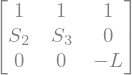

 
Approximate inverse matrix E2:


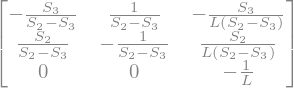

 
Approximate right hand side:


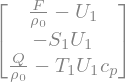

 
Approximate formula for U_2:


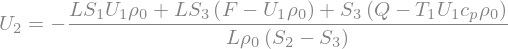

 
Approximate Q formula in U_2:


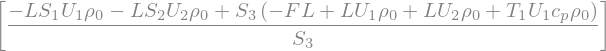

 
Approximate U_1 formula in U_2:


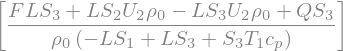

In [5]:
# Approximate solution for U_1 when U_2=0
# Set all densities the same and divide them out.
# Set Tf = S_i = 0
print("Approximate matrix E2:")
E2 = Matrix([[ 1, 1, 1],[S_2, S_3, 0],[0, 0, -L]])
display(E2)

print(" ")
print("Approximate inverse matrix E2:")
E2inv = simplify(MatrixBase.inverse_LU(E2))
display(E2inv)

print(" ")
print("Approximate right hand side:")
rhs2 = Matrix([ [F/rho_0 - U_1],  [- U_1*S_1], [Q/rho_0 - c_p*U_1*T_1]])
display(rhs2)

print(" ")
print("Approximate formula for U_2:")
soln2 = E2inv*rhs2
myeqn2 = simplify(Eq(U_2,soln2[0]))
display(myeqn2)

print(" ")
print("Approximate Q formula in U_2:")
Q_formula2 = solve(myeqn2,Q)
display(Q_formula2)

print(" ")
print("Approximate U_1 formula in U_2:")
U1_formula2 = solve(myeqn2,U_1)
display(U1_formula2)

Approximate solution should give identical results to before:
Approximate matrix E3:


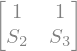

 
Approximate inverse matrix E3:


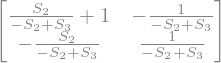

 
Approximate right hand side:


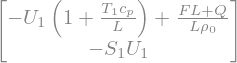

 
Approximate U_2 solution:


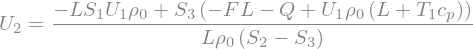

In [6]:
print("Approximate solution should give identical results to before:")
# Tinkering, even more.
# Set all densities the same and divide them out.
# Set Tf = S_i = 0
# This means we can write the problem as a 2x2 matrix:
E3 = Matrix([[ 1, 1],[S_2, S_3]])
print("Approximate matrix E3:")
display(E3)

print(" ")
print("Approximate inverse matrix E3:")
E3inv = MatrixBase.inverse_LU(E3)
display(E3inv)

print(" ")
print("Approximate right hand side:")
rhs3 = Matrix([ [(1/(rho_0*L))*(Q + F*L) - U_1*(1+c_p*T_1/L)],  [- U_1*S_1]])
display(rhs3)

print(" ")
print("Approximate U_2 solution:")
soln3 = E3inv*rhs3
myeqn3 = Eq(U_2,soln3[0])
display(simplify(myeqn3))

Shelf system matrix E4:


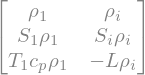

 
Column null space:


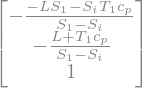

 
Right hand side:


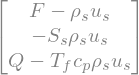

 
Formula for F (look for Q multiplier for s_3/s_1 formula in supplement section 1):


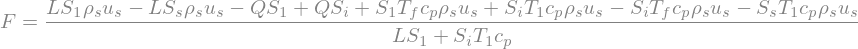

In [7]:
# Singular vector for the shelf matrix system
E4 = Matrix([[ rho_1, rho_i],[rho_1*S_1, rho_i*S_i],[c_p*rho_1*T_1,-rho_i*L]])
print("Shelf system matrix E4:")
display(E4)

# nullspace of E4 transpose is outside the range of E4:
print(" ")
print("Column null space:")
column_null_space = E4.T.nullspace()[0]
display(column_null_space)

# Form linear relation between F and Q
print(" ")
print("Right hand side:")
rhs4 = Matrix([ [F - rho_s*u_s],  [- rho_s*u_s*S_s], [Q - c_p*rho_s*u_s*T_f]])
display(rhs4)
print(" ")
print("Formula for F (look for Q multiplier for s_3/s_1 formula in supplement section 1):")
tmp = (rhs4.T)*column_null_space
myeqn4 = Eq(tmp[0],0)
tmp2 = solve(myeqn4,F)
display(simplify(Eq(tmp2[0],F)))